In [1]:
from smac import Scenario
from smac.runhistory import RunHistory
from pathlib import Path
from numpy import mean, std, min, max
from matplotlib import pyplot as plt
from matplotlib import colormaps
import os

In [2]:
def load_smac_runhistory(trial_name: str, seed: int = 0) -> RunHistory:
    smac_data_path = Path(Path.cwd(), "smac_runs", trial_name, str(seed))
    scenario = Scenario.load(smac_data_path)
    history = RunHistory()
    history.load(Path(smac_data_path, "runhistory.json"), scenario.configspace)
    return history

In [3]:
def plot_pareto_plane(history: RunHistory, incumbent_ids: list[int], title: str, cmap: str = "Paired"):
    qualities_mean: list[float] = []
    qualities_std: list[float] = []
    qualities_min: list[float] = []
    qualities_max: list[float] = []
    expevals_mean: list[int] = []
    expevals_std: list[float] = []
    cmap = colormaps[cmap]
    
    for incumbent_id in incumbent_ids:
        incumbent = history.get_config(incumbent_id)
        costs = history._cost(incumbent)
        qualities = list(map(lambda x: x[0], costs))
        expevals = list(map(lambda x: x[1], costs))

        qualities_mean.append(mean(qualities))
        qualities_std.append(std(qualities))
        qualities_min.append(min(qualities))
        qualities_max.append(max(qualities))
        expevals_mean.append(mean(expevals))
        expevals_std.append(std(expevals))

    print(expevals_std)
    print(qualities_std)

    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel("Expectation Evaluations until Termination")
    ax.set_ylabel("Solution Quality Score")

    for i, incumbent_id in enumerate(incumbent_ids):
        col = cmap(i)
        ax.errorbar(x=expevals_mean[i], y=qualities_mean[i], xerr=expevals_std[i], yerr=qualities_std[i], fmt="o", mfc=col, mec=col, capsize=5, elinewidth=1, ecolor=col)
        ax.errorbar(x=expevals_mean[i], y=qualities_min[i], xerr=0, yerr=0, ecolor=col, lolims=True)
        ax.errorbar(x=expevals_mean[i], y=qualities_max[i], xerr=0, yerr=0, ecolor=col, uplims=True)
        ax.annotate(str(i), (expevals_mean[i], qualities_mean[i]))

[985.4900872246968, 2997.081119705511, 1754.670021500835, 1203.8766708217056, 1053.643586444788, 1427.5478777647554, 1638.0330220743094, 2147.677826246636, 3364.691770729994]
[19.96364670711744, 10.364521845233305, 11.029149205386368, 16.346406016360408, 10.272221134776911, 12.723232557155626, 16.248879200230487, 8.308294528303167, 7.445806864388164]


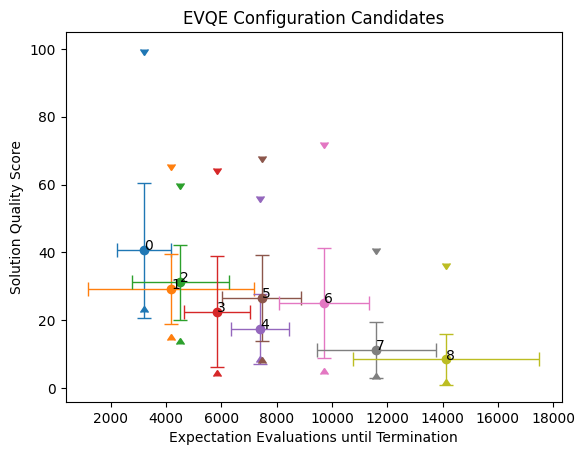

In [4]:
evqe_history = load_smac_runhistory("evqe_smac_run_1405_1", 0)
incumbent_ids = [161, 110, 167, 205, 154, 172, 195, 31, 191]

plot_pareto_plane(evqe_history, incumbent_ids, "EVQE Configuration Candidates", "tab10")

[254.02200202894414, 490.6374030019417, 545.3427072652084, 373.66742825509357, 309.0303598574248, 422.39580577374795, 1122.5878587824968, 1099.48771556866]
[24.605764692280125, 10.329209386752382, 15.567167553255771, 18.887467041546405, 16.75902922329313, 8.586222154295312, 9.321345816043536, 9.809491293171774]


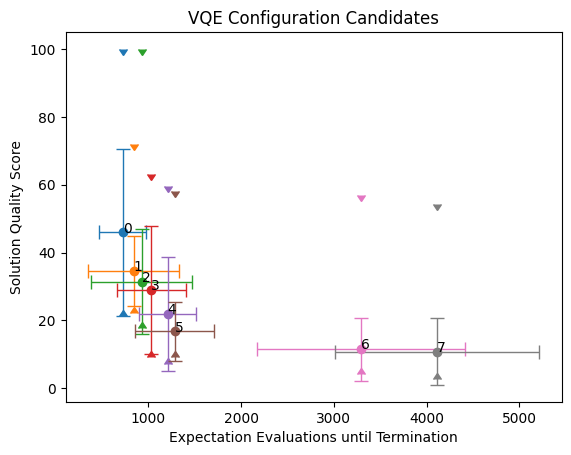

In [5]:
vqe_history = load_smac_runhistory("vqe_smac_run_1205_2", 0)
incumbent_ids = [133, 19, 47, 64, 134, 113, 67, 105]

plot_pareto_plane(vqe_history, incumbent_ids, "VQE Configuration Candidates", "tab10")

[126.19395223324656, 655.3585014571023, 255.8820601336187, 1328.5583012285588]
[1.9409402424970585, 2.9623301148095593, 6.582380060538864, 7.614831526811279]


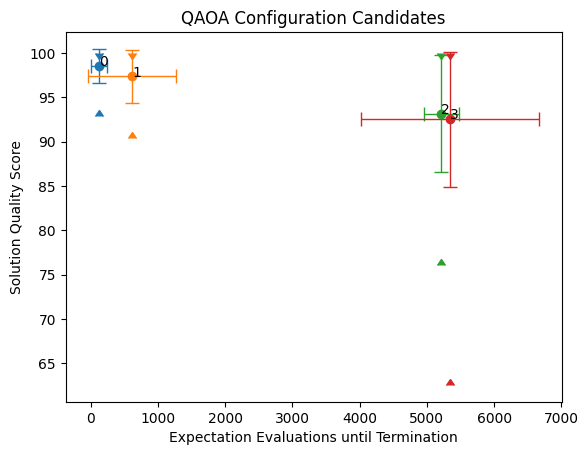

In [7]:
qaoa_history = load_smac_runhistory("qaoa_smac_run_1205_2", 0)
incumbent_ids = [25, 127, 210, 195]

plot_pareto_plane(qaoa_history, incumbent_ids, "QAOA Configuration Candidates", "tab10")